In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [8]:
#loading Csv File or dataset
data=pd.read_csv("C:\\users\\Aditi Gupta\\Desktop\\candy_crush.csv")
data.describe()



,level,num_attempts,num_success
count,16865.000000,16865.000000,16865.000000
mean,9.287222,5.535428,0.627157
std,4.343477,7.322476,0.864708
min,1.000000,0.000000,0.000000
25%,6.000000,1.000000,0.000000
50%,9.000000,3.000000,1.000000
75%,14.000000,7.000000,1.000000
max,15.000000,258.000000,55.000000


In [4]:
df= data.groupby('level').agg({
    'num_attempts':'sum', 
    'num_success':'sum'}).assign(p_win= lambda g: g['num_success']/g['num_attempts'])
df=df.reset_index()
#difficulty.assign(p_win = 'num_success'/'num_attempts')
#difficulty.assign(p_win= lambda g: g['num_success']/g['num_attempts'])
df


,level,num_attempts,num_success,p_win
0,1,1322,818,0.618759
1,2,1285,666,0.518288
2,3,1546,662,0.428202
3,4,1893,705,0.372425
4,5,6937,634,0.091394
5,6,1591,668,0.419862
6,7,4526,614,0.135661
7,8,15816,641,0.040529
8,9,8241,670,0.081301
9,10,3282,617,0.187995


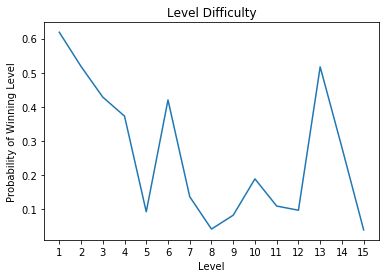

In [5]:
plt.plot(df.level,df.p_win)
plt.title("Level Difficulty")
plt.xlabel('Level')
plt.ylabel("Probability of Winning Level")
plt.xticks(range(1, 16))
plt.show()


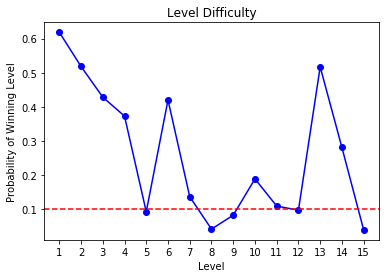

In [6]:
plt.plot(df.level,df.p_win,marker='o',color='b')
plt.title("Level Difficulty")
plt.xlabel('Level')
plt.ylabel("Probability of Winning Level")
plt.xticks(range(1, 16))
plt.plot(marker='o', color='b')
plt.axhline(y=0.1, color='r', linestyle='--')
plt.show()


In [7]:
df = df.assign(error = lambda g: np.sqrt(g.p_win * (1 - g.p_win) / 
                                                g.num_attempts))
df.head()


,level,num_attempts,num_success,p_win,error
0,1,1322,818,0.618759,0.013358
1,2,1285,666,0.518288,0.013939
2,3,1546,662,0.428202,0.012585
3,4,1893,705,0.372425,0.011112
4,5,6937,634,0.091394,0.003460


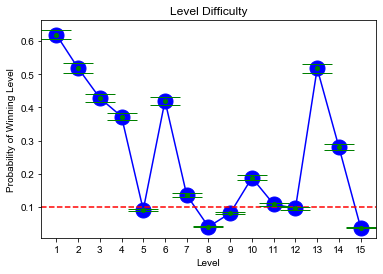

In [8]:
plt.plot(df.level,df.p_win,marker='o',color='b',markersize=15)
plt.title("Level Difficulty")
plt.xlabel('Level')
plt.ylabel("Probability of Winning Level")
plt.xticks(range(1, 16))
#plt.plot(marker='o', color='b')
plt.axhline(y=0.1, color='r', linestyle='--')
#ymin=df.p_win - df.error 
#ymax= df.p_win + df.error
# plt.style.use('seaborn')
# plt.rcParams.update({'lines.markeredgewidth': 1})
#plt.errorbar(df.level,df.p_win,ymin,ymax,)
plt.style.use('seaborn-whitegrid')
plt.errorbar( df.level,df.p_win ,yerr=df.error,fmt='o', markersize=4, capsize=15,color='green')
plt.show()


In [11]:
p=np.prod(df.p_win)
p


9.447140934486065e-12